<a href="https://colab.research.google.com/github/orel509/AttacksonImplementationsCourseBook/blob/master/Labs/Lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Colab support
!wget https://raw.githubusercontent.com/orel509/AttacksonImplementationsCourseBook/master/Labs/hamming_weight.py
!wget https://raw.githubusercontent.com/orel509/AttacksonImplementationsCourseBook/master/Labs/aes_scripts/aes_lib.py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from hamming_weight import hamming_weight
#from aes_scripts.aes_crypt_8bit import aes_crypt_8bit
#from aes_scripts.aes_crypt_8bit_and_leak import aes_crypt_8bit_and_leak
from aes_lib import aes_crypt_8bit, aes_crypt_8bit_and_leak

In [2]:
#  Make sure the matlab AES scripts are in the path
# #
#  Create two 128-bit plaintexts (exactly 16 byte)
pt1 = []
pt2 = []
for b1 in bytes('Attack at 12:56!', 'utf-8'):
  pt1 += [b1]
for b2 in bytes('Attack at 12:57!', 'utf-8'):
  pt2 += [b2]

plaintext_1 = np.uint8(pt1)
plaintext_1_1 = np.asmatrix(plaintext_1)
plaintext_2 = np.uint8(pt2)
plaintext_2_2 = np.asmatrix(plaintext_2)



In [3]:
#  how many bits are different between the two?
res = hamming_weight(np.bitwise_xor(plaintext_1_1, plaintext_2_2))
print(res)

1.0


In [4]:
#  Create a key
key_bytes = []
for byte in bytes('1234512345123456', 'utf-8'):
  key_bytes += [byte]

key = np.uint8(key_bytes)
key = np.asmatrix(key)

In [5]:
ENCRYPT = 1
DECRYPT = 0
#  Encrypt the two plaintexts
ciphertext_1 = aes_crypt_8bit(plaintext_1_1, key, ENCRYPT)
ciphertext_2 = aes_crypt_8bit(plaintext_2_2, key, ENCRYPT)

In [6]:
#  even though the plaintexts were very similar...
print(plaintext_1)
print(plaintext_2)
#  ... the ciphertexts are very different
print(ciphertext_1)
print(ciphertext_2)

[ 65 116 116  97  99 107  32  97 116  32  49  50  58  53  54  33]
[ 65 116 116  97  99 107  32  97 116  32  49  50  58  53  55  33]
[[ 42 180 180  19 227 238 187 238 237 110   2   6 107 141 160 183]]
[[ 10 223  79  16  74 212 232 141  41  91 134  32 110 141  36 110]]


In [7]:
#  how many bits are different between the two?
print(hamming_weight(np.bitwise_xor(ciphertext_1, ciphertext_2)))

52.0


In [8]:
#  Decrypt the two ciphertexts
decrypted_1 =  aes_crypt_8bit(ciphertext_1, key, DECRYPT)
decrypted_2 =  aes_crypt_8bit(ciphertext_2, key, DECRYPT)

In [9]:
#  Did we get the plaintext again?
print(plaintext_1)
print(plaintext_2)
print(decrypted_1)
print(decrypted_2)
print()

[ 65 116 116  97  99 107  32  97 116  32  49  50  58  53  54  33]
[ 65 116 116  97  99 107  32  97 116  32  49  50  58  53  55  33]
[[ 65 116 116  97  99 107  32  97 116  32  49  50  58  53  54  33]]
[[ 65 116 116  97  99 107  32  97 116  32  49  50  58  53  55  33]]



In [10]:
#  Look at the internals of AES now
[ciphertext_1, state_1, _, leak_1] = aes_crypt_8bit_and_leak(plaintext_1_1, key, ENCRYPT)
[ciphertext_2, state_2, _, leak_2] = aes_crypt_8bit_and_leak(plaintext_2_2, key, ENCRYPT)

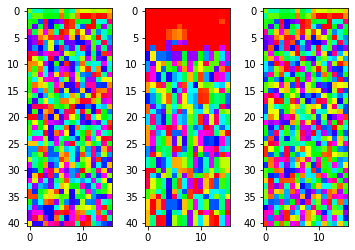

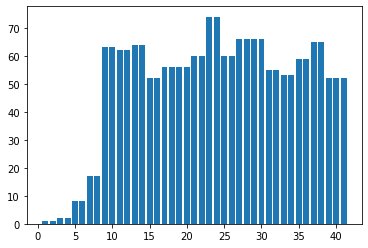

In [23]:
#  Show an image showing the two leaks side by size
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(state_1), interpolation='nearest')
plt.hsv()
plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(state_2), interpolation='nearest')
plt.hsv()

#  Show the difference in the middle
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(np.bitwise_xor(state_1, state_2)), interpolation='nearest')
plt.hsv()
plt.figure()

#  plot the HW of the difference
plt.subplot(1, 1, 1)
plt.bar(range(1, (np.shape(state_1)[0]) + 1), hamming_weight(np.bitwise_xor(state_1, state_2)))
plt.show()